# Decision Trees (DTs) and thier Ensembles
## Catch up
* Decision trees are an extremely common type of inference mappings and are wiledly used in many different fields. They perform predictions by repeatedly asking yes/no question until a final conclusion can be made on the input's class or value. These trees are versatile, serving purposes in both classification and regression tasks. Their most valuable attribute lies in their **interpretability**, allowing us to comprehend the algorithmic thought process, making them an insightful tool in data analysis and machine learning.

* One of the main drawbacks of decision trees is their high sensitivity to the training data. Changing the dataset by even a bit can cause a dramatically different tree to form, which hurts its generalizability.

* To solve this, random forest were proposed. Random forests are basically an ensamble of decision trees each trained on an randomly sampled subset of the original dataset. The final decision is performed by averaging/majority voting between the different trees in the ebsamble. Random forest dramatically improves the algorithm sensitivity and as a result is generalization abilities.

In this example we show how to construct, train and predict using both classification and regression decision trees.

In the classification problem we will try to solve is the *The Iris Classification Problem*– using the popular [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In the regression task we will try to estimate house prices based on the [California Housing Data Set](https://developers.google.com/machine-learning/crash-course/california-housing-data-description).

# Classification DT

A decision tree makes predictions by repeatedly asking a binary question. Each answer can lead into a another question or to a final conclusion on the particular entry class/value. This is represented with a simple example (taken from "normalized nerd" [Youtube video](https://www.youtube.com/watch?v=ZVR2Way4nwQ&list=PLM8wYQRetTxAl5FpMIJCcJbfZjSB0IeC_&index=1)).



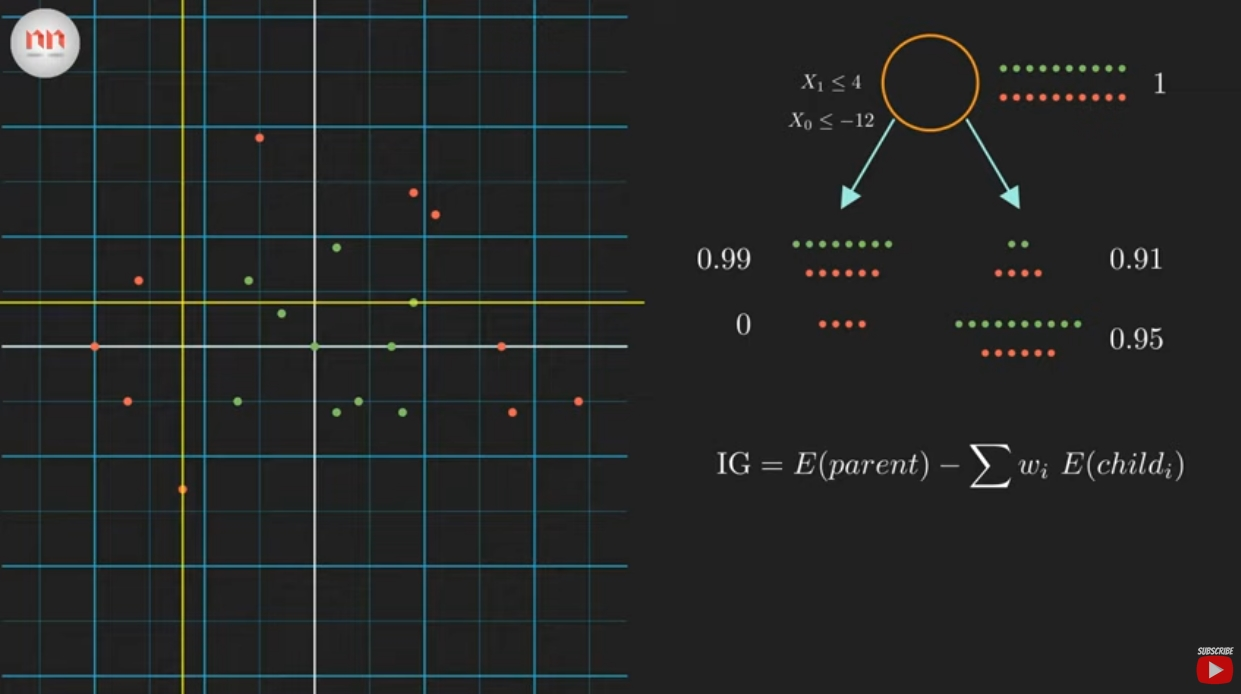

Notice that the 2D data points shown here are **not linearly seperable**. Therefore, the linear models we learned for classification, i.e., the SVM and the logistic regressor, are not compatible here.

The red and green dots next to each node represent the data points which participate in each iteration of the algorithem forming the final tree.
When a certain question (split) results with data points that are all belong to the same clase - we have a decision (leaf). So, what are the **right** questions to ask?

## Forming the tree

**Good** questions are ones which help to *purify* the subsequent dataset divisions, i.e., make each subset more uniform in terms of class distribution.

A very good measure for uniformity or certainty is the entropy, which is a value between 0-1. An entropy of 1 means a completely random or uncertain (uniformly distributed) and entropy of 0 means a complete certainty.

**Our goal - to find questions which lead to subdivisions with low entropy.**

### Information Gain
The entropy $E$ of a state is given by:
\begin{equation}
E_2 = -\sum_{i} p_i \log_2(p_i)
\end{equation}
$p_i$ is the probability of class $i$

The **information gain - $IG$** in the entropy sense is given by:
\begin{equation}
IG = E_2(parent)-\sum_{i} w_i E_2(child)
\end{equation}

Where $w_i$ is a normalization weight given by the ratio of each subdivision to the parent dataset size.

\begin{equation}
w_i = len(child_i)/len(parent)
\end{equation}


## Data  

Imagine you are a botanist seeking an automated way to categorize each Iris flower you find. Machine learning provides many algorithms to statistically classify flowers. For instance, a sophisticated machine learning program could classify flowers based on photographs. Our ambitions are more modest — we are going to classify Iris flowers, aka 'The Iris classification problem', based on the length and width measurements of their [sepals](https://en.wikipedia.org/wiki/Sepal) and [petals](https://en.wikipedia.org/wiki/Petal).

The Iris genus entails about 300 species, but our program will classify only the following three:

* Iris setosa
* Iris versicolor
* Iris virginica

<table>
  <tr><td>
    <img src="https://www.tensorflow.org/images/iris_three_species.jpg"
         alt="Petal geometry compared for three iris species: Iris setosa, Iris virginica, and Iris versicolor">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://commons.wikimedia.org/w/index.php?curid=170298">Iris setosa</a> (by <a href="https://commons.wikimedia.org/wiki/User:Radomil">Radomil</a>, CC BY-SA 3.0), <a href="https://commons.wikimedia.org/w/index.php?curid=248095">Iris versicolor</a>, (by <a href="https://commons.wikimedia.org/wiki/User:Dlanglois">Dlanglois</a>, CC BY-SA 3.0), and <a href="https://www.flickr.com/photos/33397993@N05/3352169862">Iris virginica</a> (by <a href="https://www.flickr.com/photos/33397993@N05">Frank Mayfield</a>, CC BY-SA 2.0).<br/>&nbsp;
  </td></tr>
</table>

Fortunately, someone has already created a [data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) of 150 Iris flowers records with the sepal (עלה גביע) and petal (עלה כותרת) measurements.

In [1]:
# importing libraries
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Random seed
seed = 100
np.random.seed(seed)

In [2]:
# importing the data
iris = datasets.load_iris()
data  = pd.DataFrame({'sepal_length': iris.data[:,0],
                   'sepal_width': iris.data[:,1],
                   'petal_length': iris.data[:,2],
                   'petal_width': iris.data[:,3],
                   'type': iris.target})
data

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
# Train/Test split
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1].values # The iloc property gets, or sets, the value(s) of the specified indexes.
Y = data.iloc[:, -1].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)
print(f'x_tr: {X_train.shape} ; y_tr: {Y_train.shape} ; x_tst: {X_test.shape} ; y_tst: {Y_test.shape}')

x_tr: (120, 4) ; y_tr: (120, 1) ; x_tst: (30, 4) ; y_tst: (30, 1)


## Model


In [4]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor '''

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain

        # for leaf node
        self.value = value

In [5]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''

        # initialize the root of the tree
        # self.names = ['Iris setosa','Iris versicolor','Iris virginica']
        self.root = None

        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''

        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)

        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"] > 0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["info_gain"])

        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''

        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")

        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y)
                    # update the best split if needed
                    if curr_info_gain > max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain

        # return best split
        return best_split

    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''

        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right

    def information_gain(self, parent, l_child, r_child):
        ''' function to compute information gain '''

        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)

        gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain

    def entropy(self, y):
        ''' function to compute entropy '''

        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''

        Y = list(Y)
        return max(Y, key=Y.count) # the most common label

    def fit(self, X, Y):
        ''' function to train the tree '''

        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        ''' function to predict new dataset '''

        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''

        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

    def print_tree(self, tree=None, indent=" -"):
      ''' function to print the tree '''

      if not tree:
          tree = self.root

      if tree.value is not None:
          # print(self.names[int(tree.value)])
          print(round(tree.value))

      else:
          print(f'feature{tree.feature_index} <= {tree.threshold}? [info gain: {tree.info_gain:.2f}]')
          print("%sleft:" % (indent), end="")
          self.print_tree(tree.left, " " + indent + "-")
          print("%sright:" % (indent), end="")
          self.print_tree(tree.right, " " + indent + "-")

### Fitting

In [6]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(X_train,Y_train)
classifier.print_tree()
#feature0, feature1, feature2, feature3 are sepal_length, sepal_width, petal_length, petal_width; respectivly

feature2 <= 1.9? [info gain: 0.91]
 -left:0
 -right:feature3 <= 1.6? [info gain: 0.67]
  --left:feature2 <= 4.9? [info gain: 0.34]
   ---left:1
   ---right:feature0 <= 6.0? [info gain: 0.32]
    ----left:2
    ----right:2
  --right:feature2 <= 4.8? [info gain: 0.10]
   ---left:feature1 <= 3.0? [info gain: 0.81]
    ----left:2
    ----right:1
   ---right:2


### Sanity check: visualizing the data




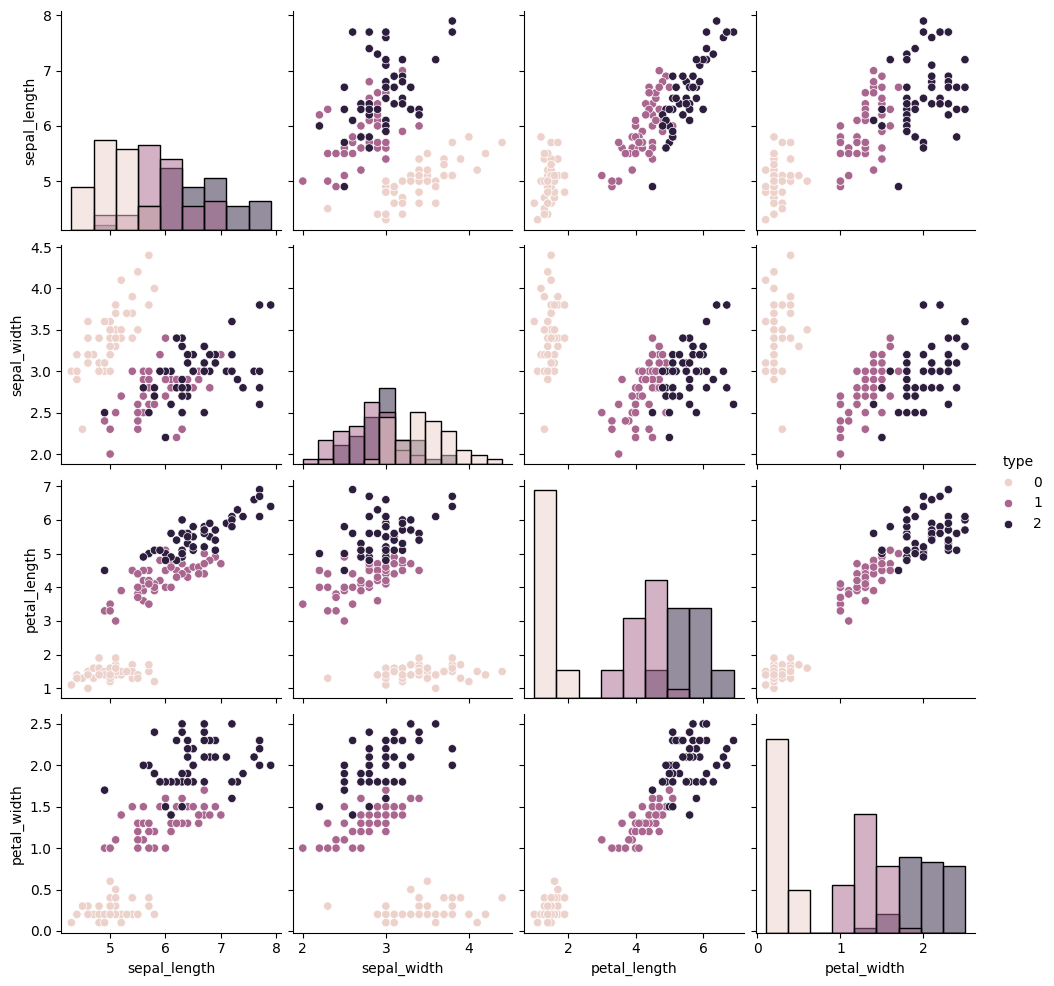

In [7]:
sns.pairplot(data,hue='type', diag_kind='hist') # Plot pairwise relationships in a dataset.
plt.show()

The tree makes sense:


*   max_depth is indeed 3 (actually 4, as counting from zero)
*   the root node - feature2 <= ...? - which correpondes to petal_length is clearly seen as a "good" data partition, as all the label-0 points of the third row in the figure are approximatly below 2 and **at the same time**, all other labels are above 2.
<!-- *   feature1 is less distinctive comparaed to the others, not showing as a question in the tree. -->


<!-- ## Generate a RF
As you leared in class, random forest is an ensamble of multiple decision trees, each builded from different randomly sampled subsets of the avilable dataset. The prediction of the random forest is obtained by a majority vote over the predictions of the individual trees. -->

### Testing

Decision tree model accuracy: 0.9666666666666667


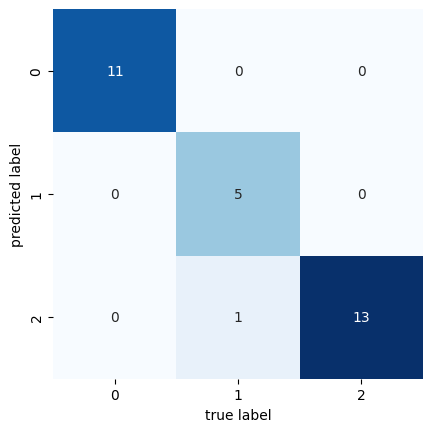

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

Y_pred = np.array(classifier.predict(X_test))
print(f'Decision tree model accuracy: {accuracy_score(Y_test, Y_pred)}')

mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');

# Regression DT
## Forming the tree

Decision trees (DT) can also be used for regression tasks. Suprisingly the basic architecture of DT do not change, accept for:

1.   The formulation of the IG: having continuos values now the entropy is replaced with **variance reduction**, i.e., by how much the new childs leads to subdivisions with lower variance (higher certainty).
![](https://drive.google.com/uc?export=view&id=1nfstFrz3tTVoyAx67ULZcstSoYM9N955)
2.   Leaf value calculation: given a regression tree, the value for a new entry will be the **averaged value of all entries in the same leaf**.
![](https://drive.google.com/uc?export=view&id=1iPNb6MykhmLYdb7cWmwQP4QeeXoMoQdL)

Note that colors represt the y-axis values as a heatmap
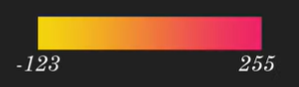



## Data

California housing data set (California Housing prices problem), contains data drawn from the 1990 U.S. Census.

![](https://drive.google.com/uc?export=view&id=1mwuvtkOkRMGK44CmJ9udVTQmOHlzi-9c)


In [9]:
# Import the dataset.
data = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label
data["median_house_value"] /= 1000.0

data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111.4
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103.6
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85.8


Scaling `median_house_value` puts the value of each house in units of thousands. Scaling will keep loss values and learning rates in a friendlier range.  

In [10]:
# Train/Test split
locs = np.random.choice(len(data), size=1000, replace=False)
X = data.iloc[locs, :-1].values
Y = data.iloc[locs, -1].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)
print(f'x_tr: {X_train.shape} ; y_tr: {Y_train.shape} ; x_tst: {X_test.shape} ; y_tst: {Y_test.shape}')

x_tr: (800, 8) ; y_tr: (800, 1) ; x_tst: (200, 8) ; y_tst: (200, 1)


## Model

In [11]:
regressor = DecisionTreeClassifier(min_samples_split=3, max_depth=3)

from types import MethodType

def variance_reduction(self, parent, l_child, r_child):
    ''' function to compute variance reduction '''

    weight_l = len(l_child) / len(parent)
    weight_r = len(r_child) / len(parent)
    reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
    return reduction

def mean_value(self, Y):
    ''' function to compute leaf node '''

    val = np.mean(Y)
    return val

regressor.information_gain = MethodType(variance_reduction, regressor)
regressor.calculate_leaf_value = MethodType(mean_value, regressor)

### Fitting & testing

In [12]:
regressor.fit(X_train,Y_train)
regressor.print_tree()

feature7 <= 5.3096? [info gain: 4785.96]
 -left:feature7 <= 3.3618? [info gain: 1357.26]
  --left:feature7 <= 2.49? [info gain: 330.59]
   ---left:feature4 <= 469.0? [info gain: 233.43]
    ----left:108
    ----right:139
   ---right:feature1 <= 37.94? [info gain: 443.22]
    ----left:168
    ----right:115
  --right:feature2 <= 40.0? [info gain: 794.18]
   ---left:feature0 <= -121.92? [info gain: 682.80]
    ----left:254
    ----right:189
   ---right:feature6 <= 349.0? [info gain: 2286.66]
    ----left:234
    ----right:330
 -right:feature7 <= 7.0879? [info gain: 4076.14]
  --left:feature2 <= 38.0? [info gain: 2117.28]
   ---left:feature7 <= 6.311? [info gain: 1218.41]
    ----left:270
    ----right:345
   ---right:feature7 <= 6.6178? [info gain: 2035.06]
    ----left:452
    ----right:323
  --right:feature7 <= 8.1988? [info gain: 947.93]
   ---left:feature2 <= 22.0? [info gain: 2245.53]
    ----left:365
    ----right:462
   ---right:feature3 <= 2682.0? [info gain: 176.25]
    ----left:

In [13]:
Y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_test, Y_pred))

np.float64(85.11322304447268)

## Ensemble DTs
This powerful and versatile tool in machine learning can combine the strengths of two techniques: decision trees and bootstrapping.
*   Instead of relying on one decision tree, Random Forest builds an ensemble of multiple decision trees, each trained on a different **bootstrapped** sample of the original data.
*   Each tree in the forest considers only a random subset of features at each split, further reducing the risk of overfitting.
* Predictions are made by aggregating the predictions of all individual trees, typically by majority vote for classification or averaging for regression.

Bootstrapping randomness plays a crucial role in reducing overfitting. By using different data samples and feature subsets for each tree, the forest prevents any single tree from becoming too specific to the training data.

The combined power of multiple decision trees with reduced overfitting makes Random Forests more robust and accurate than individual decision trees, especially for complex data.

Anothe alternative is **Extra Trees Forest**, which is constructed from the original training sample. Then, at each test node, each tree is provided with a random sample of k features from the feature-set from which each decision tree must select the best feature to split the data into.

In [14]:
def Ensemble_acc(method, ensamble_size = 3):
  random_forest = np.zeros(shape=[len(Y_test), ensamble_size])
  for idx in range(ensamble_size):
    if method == "splitting":
      X_train_tree, _ , Y_train_tree, _ = train_test_split(X_train, Y_train, test_size=.2)
    elif method == "bootstrapping":
        indices = list(set(np.random.choice(len(X_train), len(X_train), replace = True)))
        X_train_tree, Y_train_tree = X_train[indices], Y_train[indices]
    else:
      return

    model = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
    model.information_gain = MethodType(variance_reduction, model)
    model.calculate_leaf_value = MethodType(mean_value, model)
    model.fit(X_train_tree,Y_train_tree)
    random_forest[:, idx] = model.predict(X_test)

  Y_pred_tree = np.mean(random_forest,1)
  print(f'Ensamble error for method {method} is: {np.sqrt(mean_squared_error(Y_test, Y_pred_tree))}')

In [15]:
# without bootstrapping
Ensemble_acc("splitting")
# with bootstrapping
Ensemble_acc("bootstrapping")

Ensamble error for method splitting is: 83.78389965211571
Ensamble error for method bootstrapping is: 77.56795485703347
